In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disease-outbreaks-in-nigeria-datasets/meningitis_dataset.csv


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [3]:
NA_list=['NaN', 'Null', 'null serotype' ]
df=pd.read_csv('/kaggle/input/disease-outbreaks-in-nigeria-datasets/meningitis_dataset.csv', na_values=NA_list)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,urban_settlement,report_date,report_year,age,age_str,date_of_birth,child_group,adult_group,disease,cholera,diarrhoea,measles,viral_haemmorrhaphic_fever,meningitis,ebola,marburg_virus,yellow_fever,rubella_mars,malaria,serotype,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,0,2018-05-15,2018,32,32 years,1986-01-17,0,1,Cholera,1,0,0,0,0,0,0,0,0,0,NaN,0,0,0,alive,1,0,confirmed,0,1,1
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,0,2017-02-28,2017,32,32 years,1985-09-01,0,1,Marburg Virus,0,0,0,0,0,0,1,0,0,0,NaN,0,0,1,Alive,1,0,Confirmed,1,0,1
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,1,2012-03-02,2012,24,24 years,1988-05-01,0,1,Marburg Virus,0,0,0,0,0,0,1,0,0,0,NaN,0,0,1,Dead,0,1,Not Confirmed,1,0,1
3,4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,Rural,1,0,2010-05-21,2010,63,63 years,1947-05-24,0,1,Measles,0,0,1,0,0,0,0,0,0,0,NaN,0,0,1,Alive,1,0,Not Confirmed,1,0,1
4,5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,Urban,0,1,2017-08-28,2017,9,9 years,2008-01-07,1,0,Rubella Mars,0,0,0,0,0,0,0,0,1,0,NaN,0,0,1,Alive,1,0,Confirmed,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284479,288418,Mukthar,Alimat,Ajibewa,Female,0,1,Cross River,Rural,1,0,2012-08-24,2012,67,67 years,1945-07-10,0,1,Ebola,0,0,0,0,0,1,0,0,0,0,NaN,0,0,1,Dead,0,1,Confirmed,1,0,1
284480,288419,Akenzua,Deborah,Rofeeqat,Female,0,1,Kwara,Urban,0,1,2009-01-19,2009,64,64 years,1945-01-27,0,1,Ebola,0,0,0,0,0,1,0,0,0,0,NaN,0,0,1,Dead,0,1,Confirmed,1,0,1
284481,288420,Isa,Deborah,Tofunmi,Female,0,1,Katsina,Rural,1,0,2010-06-10,2010,33,33 years,1977-10-03,0,1,Malaria,0,0,0,0,0,0,0,0,0,1,NaN,0,0,1,Alive,1,0,Confirmed,0,1,1
284482,288421,Uba,Ismail,Akpabio,Male,1,0,Jigawa,Rural,1,0,2016-01-11,2016,18,18 years,1998-05-07,0,1,Malaria,0,0,0,0,0,0,0,0,0,1,NaN,0,0,1,Dead,0,1,Not Confirmed,1,0,1


In [4]:
# how many dieseas are there in data?

df.disease.value_counts()

Cholera                       28589
Diarrhoea                     28550
Rubella Mars                  28539
Malaria                       28535
Measles                       28471
Marburg Virus                 28430
Yellow Fever                  28428
Viral Haemmorrhaphic Fever    28401
Meningitis                    28362
Ebola                         28179
Name: disease, dtype: int64

In [5]:
data=df[['id', 'gender', 'state', 'settlement', 'report_year', 'age', 'disease', 'serotype', 
         'health_status', 'report_outcome']]
data.head()

,id,gender,state,settlement,report_year,age,disease,serotype,health_status,report_outcome
0,1,Female,Rivers,Rural,2018,32,Cholera,NaN,alive,confirmed
1,2,Male,Ebonyi,Rural,2017,32,Marburg Virus,NaN,Alive,Confirmed
2,3,Female,Ogun,Urban,2012,24,Marburg Virus,NaN,Dead,Not Confirmed
3,4,Female,Ondo,Rural,2010,63,Measles,NaN,Alive,Not Confirmed
4,5,Male,Oyo,Urban,2017,9,Rubella Mars,NaN,Alive,Confirmed


In [6]:
data.isnull().sum()

id                     0
gender                 0
state                  0
settlement             0
report_year            0
age                    0
disease                0
serotype          256122
health_status          0
report_outcome         0
dtype: int64

we can with aid of LabelEncoder later dedicate Null-Values to a separtae Class.

# Data Visualization

Diseases and states or settelment

In [7]:
data_state= data.groupby(['state', 'disease'])['id'].count().reset_index(name='Number of Patients').sort_values(by= 'Number of Patients', ascending= False)
data_state

px.bar(data_state, x= 'state' , y='Number of Patients', color= 'disease')


In [8]:
data_settlement= data.groupby(['settlement', 'disease', 'health_status'])['id'].count().reset_index(name='Number of Patients').sort_values(by= 'Number of Patients', ascending= False)
data_settlement

px.bar(data_settlement, x= 'settlement' , y='Number of Patients', color= 'disease')

In [9]:
data_year= data.groupby(['state', 'report_year'])['id'].count().reset_index(name='Number of Patients').sort_values(by= 'Number of Patients', ascending= False)
data_year

px.bar(data_year, x= 'report_year', y='Number of Patients', color= 'state')


# Diseases

In [10]:
data_disease= data.groupby(['disease'])['id'].count().reset_index(name='Number of Patients').sort_values(by= 'Number of Patients', ascending= False)
data_state
px.pie(data_disease, values='Number of Patients', names= 'disease' , title= 'Number of patients of each dieases', 
       width=800 , height=800 , color_discrete_sequence = px.colors.sequential.RdBu)

number of patinets in each year

In [11]:
data_years= data.groupby(['report_year'])['id'].count().reset_index(name='Number of Patients').sort_values(by= 'Number of Patients', ascending= False)
data_years
px.pie(data_years, values='Number of Patients', names= 'report_year' , title= 'Number of patients in each year', 
       width=800 , height=800 , color_discrete_sequence = px.colors.sequential.RdBu)

# Disease and gender of patinets

In [12]:
data_gender= data.groupby(['gender', 'disease', 'health_status'])['id'].count().reset_index(name='Number of Patients').sort_values(by= 'Number of Patients', ascending= False)
data_gender

px.bar(data_gender, x= 'gender' , y='Number of Patients', color= 'disease')


In [13]:
px.bar(data_gender, x= 'gender' , y='Number of Patients', color= 'health_status')


In [14]:
data1=data.loc[data['health_status']== 'Alive']
data1.gender.value_counts()

Female    73461
Male      68733
Name: gender, dtype: int64

In [15]:
data1=data.loc[data['health_status']== 'Dead']
data1.gender.value_counts()

Female    73810
Male      68479
Name: gender, dtype: int64

the features have no correlation with dieseas or with eachothers!!!!

# dieseas and age of Patients

In [16]:
data_age= data.groupby(['age', 'disease', 'health_status'])['id'].count().reset_index(name='Number of Patients').sort_values(by= 'Number of Patients', ascending= False)
data_age

px.bar(data_age, x= 'age' , y='Number of Patients', color= 'health_status')


In [17]:
px.bar(data_age, x= 'health_status' , y='Number of Patients', color= 'age')


In [18]:
data_age2= data.groupby(['age', 'disease' ])['id'].count().reset_index(name='Number of Patients').sort_values(by= 'Number of Patients', ascending= False)
data_age2


,age,disease,Number of Patients
28,2,Viral Haemmorrhaphic Fever,775
24,2,Marburg Virus,775
21,2,Diarrhoea,767
29,2,Yellow Fever,764
26,2,Meningitis,755
...,...,...,...
3,0,Malaria,7
6,0,Meningitis,5
5,0,Measles,4
1,0,Diarrhoea,3


In [19]:
px.scatter(data_age2, x= 'age', y='Number of Patients' , color='disease' )

In [20]:
data_serotype= data.groupby(['serotype', 'disease' ])['id'].count().reset_index(name='Number of Patients').sort_values(by= 'Number of Patients', ascending= False)
data_serotype

,serotype,disease,Number of Patients
2,Neisseria meningitidis group W (NmW),Meningitis,14194
1,Neisseria meningitidis group C (NmC),Meningitis,7130
0,Neisseria meningitidis group A (NmA),Meningitis,7038


In [21]:
px.bar(data_serotype, x='serotype' , y='Number of Patients', color= 'disease' )


Conclusion:

we can colculde from Data-Visulization that dieseases can occur independent of state, settlement, gender. and maybe only age is a feature which can affect the health-Status

In [22]:
data.health_status.value_counts()

Dead     142289
Alive    142194
alive         1
Name: health_status, dtype: int64

In [23]:

data.loc[df['health_status']== 'alive', 'health_status']='Alive'        

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
data.health_status.value_counts()

Dead     142289
Alive    142195
Name: health_status, dtype: int64

In [25]:
data.loc[df['report_outcome']== 'confirmed', 'report_outcome']='Confirmed'     

In [26]:
data.report_outcome.value_counts()

Not Confirmed    142746
Confirmed        141738
Name: report_outcome, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x
data2=data.drop(columns=['id'])
data2=data2.apply(Labelencoder_feature)
data2.head()

,gender,state,settlement,report_year,age,disease,serotype,health_status,report_outcome
0,0,32,0,9,32,0,3,0,0
1,1,10,0,8,32,4,3,0,0
2,0,27,1,3,24,4,3,1,1
3,0,28,0,1,63,5,3,0,1
4,1,30,1,8,9,7,3,0,0


<AxesSubplot:>

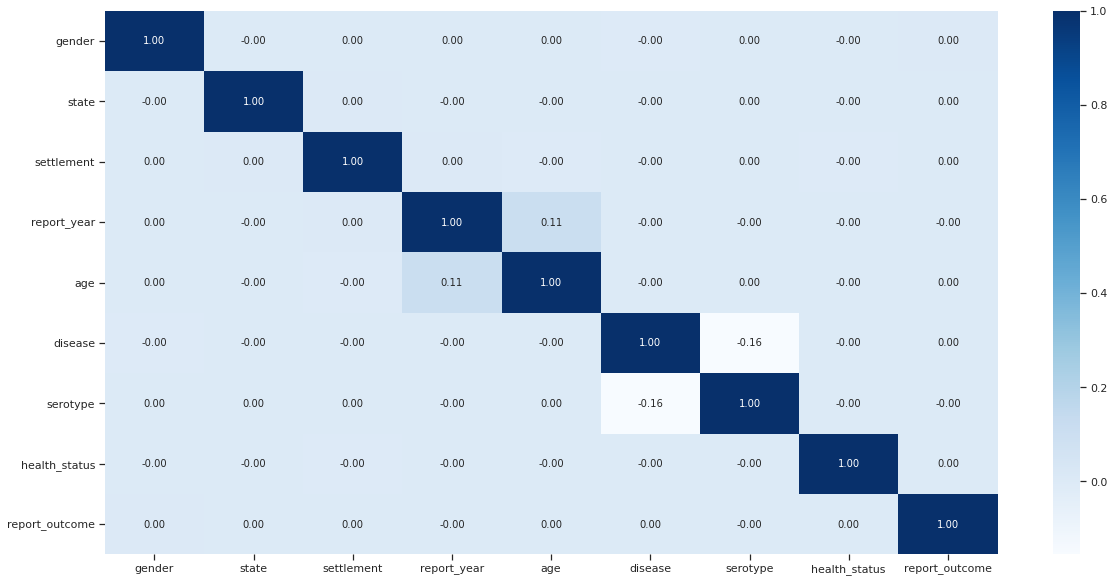

In [28]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(data2.corr(), annot = True, fmt = '.2f', cmap = 'Blues', )

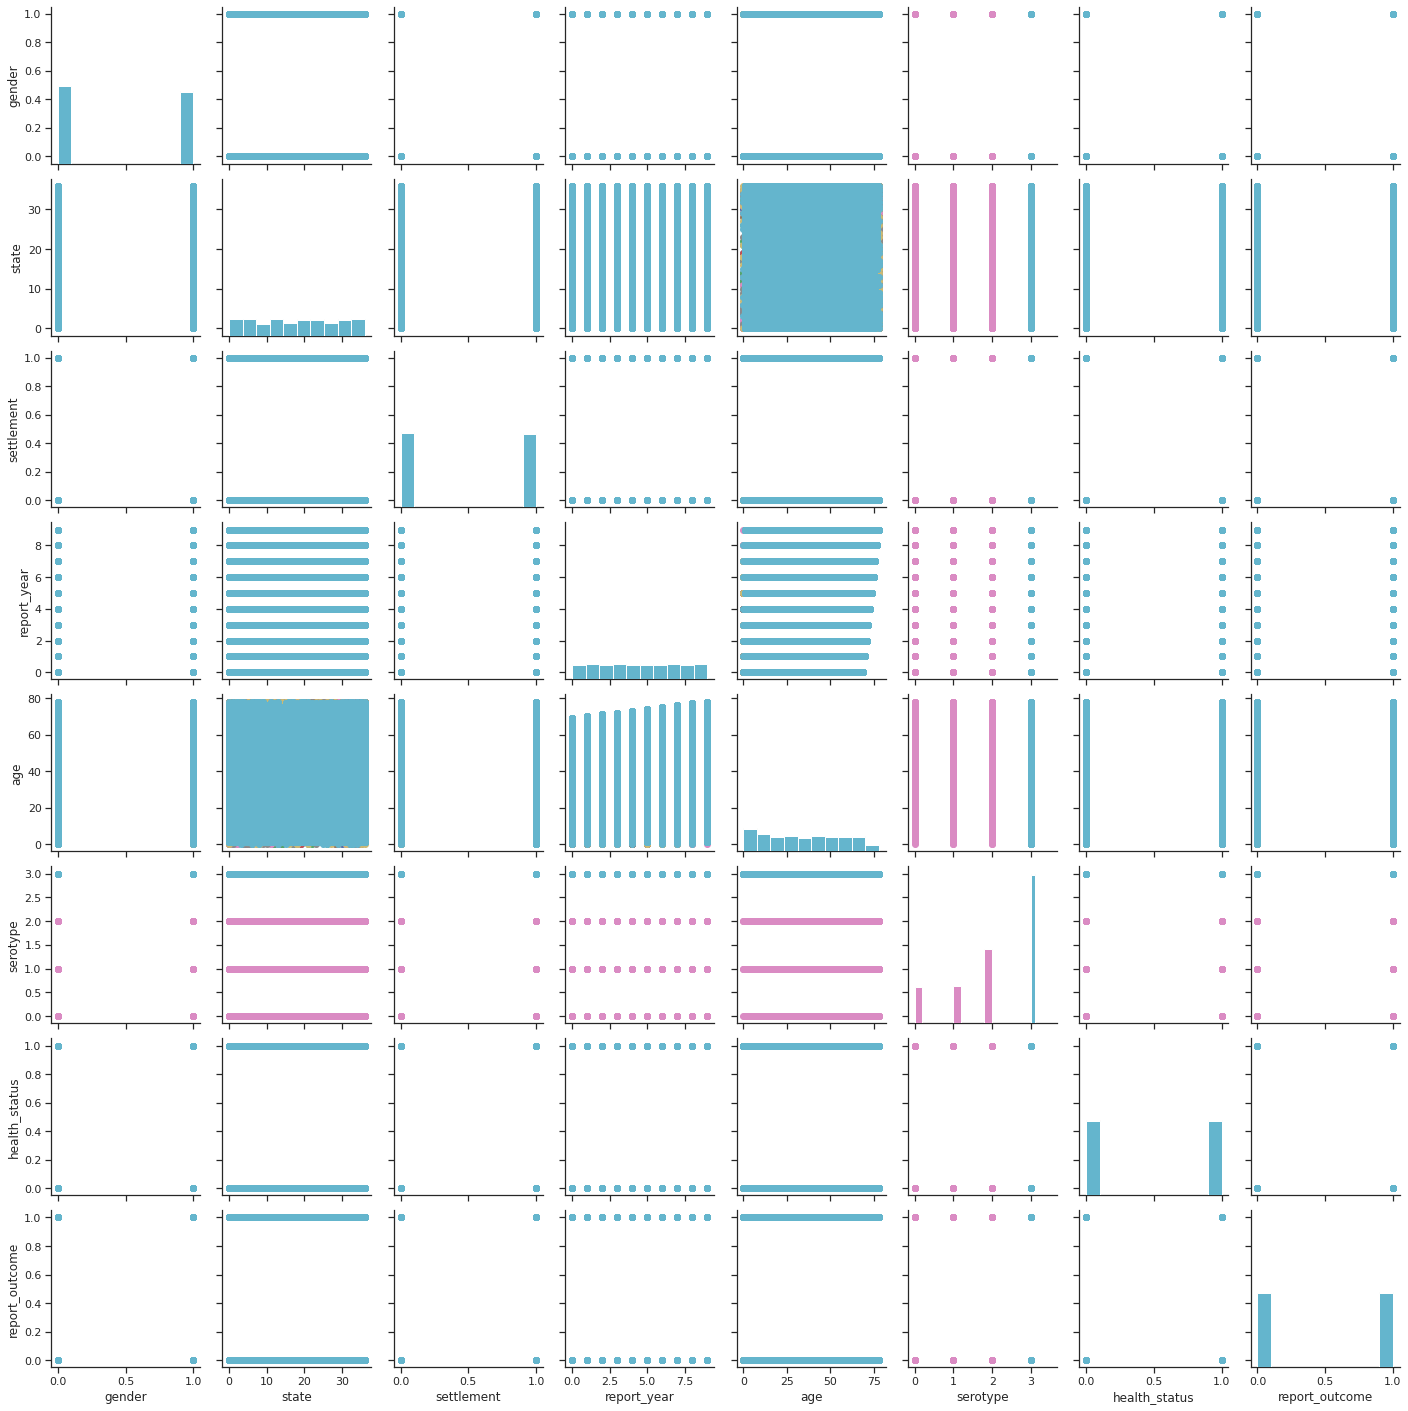

In [29]:
Features_Region_p=sns.PairGrid(data2, hue='disease')

Features_Region_p.map_diag(plt.hist)
Features_Region_p.map_offdiag(plt.scatter)

the only feature which may have a correlation with dieseas is serotype and we see it is why this feature has values only for a spesific disease (Meninigent)
there is no reason to continue forecasting with aid of these features. Diseases have no colrelation with other features 